In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_mov = pd.read_csv('/Users/mac/Desktop/py/MOD_9/tmdb_movies.csv')
df_gen = pd.read_csv('/Users/mac/Desktop/py/MOD_9/tmdb_genres.csv')

In [50]:
df_mov_sort = df_mov.sort_values(by='vote_count', ascending=0)
q3 = df_mov_sort['vote_count'].quantile(0.75)
df_mov_q3 = df_mov_sort[df_mov_sort['vote_count'] > q3].reset_index(drop=True)
df_mov_q3.loc[:9]

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,96,160000000,http://inceptionmovie.warnerbros.com/,27205,en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,2010-07-14,825532764,148.0,Released,Your mind is the scene of the crime.,Inception,8.1,13752,28.0
1,65,185000000,http://thedarkknight.warnerbros.com/dvdsite/,155,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,2008-07-16,1004558444,152.0,Released,Why So Serious?,The Dark Knight,8.2,12002,18.0
2,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
3,16,220000000,http://marvel.com/avengers_movie/,24428,en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,2012-04-25,1519557910,143.0,Released,Some assembly required.,The Avengers,7.4,11776,878.0
4,788,58000000,http://www.foxmovies.com/movies/deadpool,293660,en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,2016-02-09,783112979,108.0,Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,28.0
5,95,165000000,http://www.interstellarmovie.net/,157336,en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,2014-11-05,675120017,169.0,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,12.0
6,287,100000000,http://unchainedmovie.com/,68718,en,Django Unchained,"With the help of a German bounty hunter, a fre...",82.121691,2012-12-25,425368238,165.0,Released,"Life, liberty and the pursuit of vengeance.",Django Unchained,7.8,10099,18.0
7,94,170000000,http://marvel.com/guardians,118340,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,2014-07-30,773328629,121.0,Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,28.0
8,426,75000000,http://www.thehungergames.movie/,70160,en,The Hunger Games,Every year in the ruins of what was once North...,68.550698,2012-03-12,691210692,142.0,Released,May The Odds Be Ever In Your Favor.,The Hunger Games,6.9,9455,878.0
9,127,150000000,http://www.madmaxmovie.com/,76341,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,2015-05-13,378858340,120.0,Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,28.0


In [51]:
df_mov_bydate = df_mov.sort_values(by='release_date', ascending=0)
year = lambda daytime: pd.DatetimeIndex(daytime).year
df_mov_bydate = df_mov_bydate[(year(df_mov_bydate['release_date']) > 2009) & (year(df_mov_bydate['release_date']) < 2017)] #jak by tu mona więcej wciągnąć w lambdę?
df_mov_bydate['year'] = year(df_mov_bydate['release_date'])
df_mov_avbure = df_mov_bydate.groupby('year').agg({'revenue': 'mean', 'budget':'mean'})
df_mov_avbure



,revenue,budget
year,,
2010,9.043811e+07,3.449541e+07
2011,9.200413e+07,3.477232e+07
2012,1.160659e+08,3.492203e+07
2013,1.013485e+08,3.552329e+07
2014,1.013466e+08,3.095989e+07
2015,1.054399e+08,3.113216e+07
2016,1.390496e+08,4.570327e+07


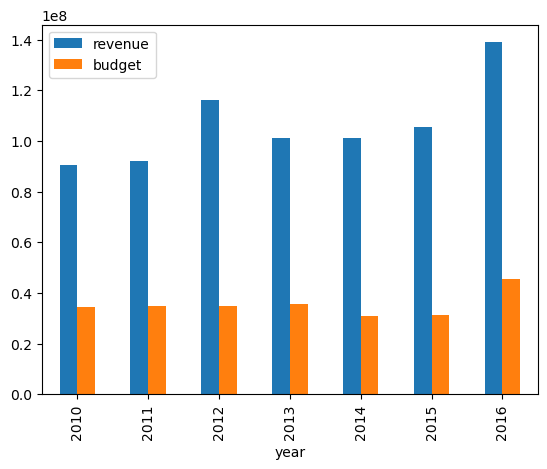

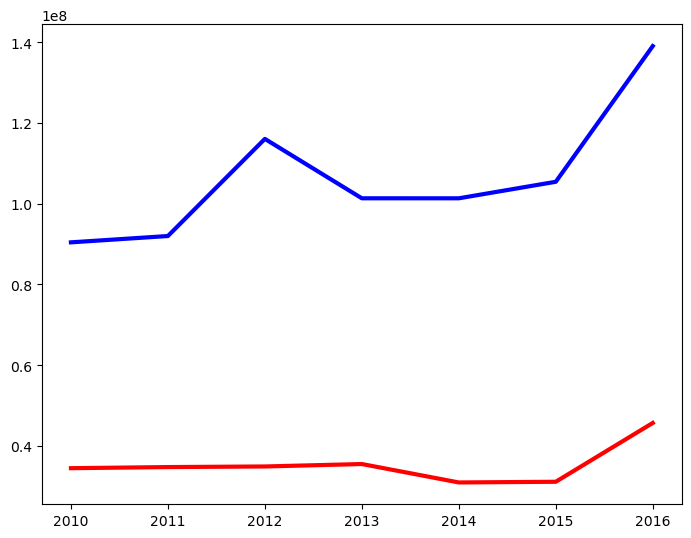

In [81]:
df_mov_avbure.plot(kind='bar')
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
#axes.bar(df_mov_avbure['revenue'], df_mov_avbure['revenue']) #jak dodać barchart??
axes.plot( df_mov_avbure['revenue'],label=df_mov_avbure.keys(),linewidth=3, color='blue')
axes.plot( df_mov_avbure['budget'],label=df_mov_avbure.keys(),linewidth=3, color='red')


In [105]:
df_mov.sample(3)
df_gen.rename(columns={'Unnamed: 0': 'genre_id'}, inplace=1)
df_movgen = pd.merge(df_mov, df_gen, on='genre_id')
df_movgen

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
2,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
3,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action
4,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4714,0,NaN,282128,en,An American in Hollywood,A talented young filmmaker from New York sets ...,0.015697,2014-07-18,0,89.0,Released,NaN,An American in Hollywood,0.0,0,NaN,NaN
4799,4716,0,NaN,38786,en,The Blood of My Brother: A Story of Death in Iraq,THE BLOOD OF MY BROTHER goes behind the scenes...,0.005256,2005-11-25,0,90.0,Released,NaN,The Blood of My Brother: A Story of Death in Iraq,0.0,0,NaN,NaN
4800,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN
4801,4666,225000,http://detroitfirefilm.org/,139948,en,Burn,"A character-driven, action-packed documentary ...",0.126676,2012-11-01,111300,86.0,Released,One Year on the Front Lines of the Battle to S...,Burn,6.9,6,10769.0,Foreign


In [121]:
df_movgen.sort_values(by=['genres'])
bygenre = df_movgen.pivot_table(values='status', index='genres', aggfunc=len)
bygenre


,status
genres,
Action,754
Adventure,339
Animation,123
Comedy,1042
Crime,195
Documentary,89
Drama,1207
Family,56
Fantasy,117


In [126]:
bytime = df_movgen.pivot_table(values='runtime', index='genres', aggfunc='mean')
bytime.sort_values(by=['runtime'], ascending=0)

,runtime
genres,
History,133.960000
War,126.125000
Western,117.925926
Drama,115.521559
Adventure,113.061947
Crime,112.143590
TV Movie,110.500000
Action,109.058355
Science Fiction,109.031250


<Axes: ylabel='Frequency'>

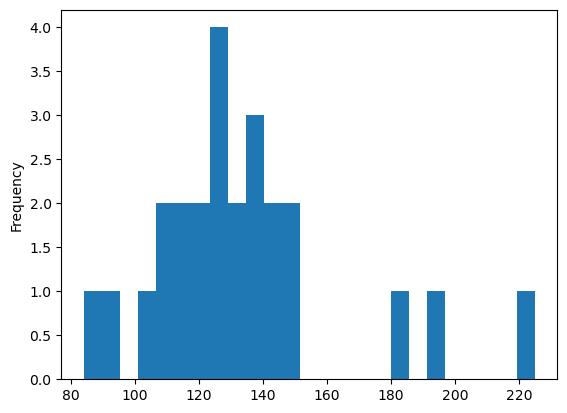

In [136]:
history = df_movgen.loc[df_movgen['genres'] == 'History']
history
history['runtime'].plot(kind='hist',bins=len(history))
